In [1]:
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from colors import BLUE, ORANGE, PURPLE
from datasets.mixture import x as X_train, y as y_train, sample, OptimalBayes

/Users/euclidean/venv/kaggle/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X_test, y_test = sample(n=10000, seed=0)

In [3]:
data = []

for n_neighbors in [
    1, 3, 5, 7, 9, 11, 15, 17, 21, 25, 31, 37, 45, 55, 69, 85, 101, 125, 151,
]:
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(X_train, y_train)
    data.append({
        'df':    X_train.shape[0] / n_neighbors,
        'Train': 1 - neigh.score(X_train, y_train),
        'Test':  1 - neigh.score(X_test,  y_test ),
    })

err_neigh = pd.DataFrame(data=data).set_index('df')

In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)
err_reg = pd.DataFrame(data={
    'df':    1 + X_train.shape[1],
    'Train': [((reg.predict(X_train) > .5) != y_train).mean()],
    'Test':  [((reg.predict(X_test ) > .5) != y_test ).mean()],
}).set_index('df')

In [5]:
err_bayes = pd.Series(
    data=(OptimalBayes().predict(X_test) != y_test).mean(),
    index=[err_neigh.index.min(), err_neigh.index.max()],
    name='Bayes',
)

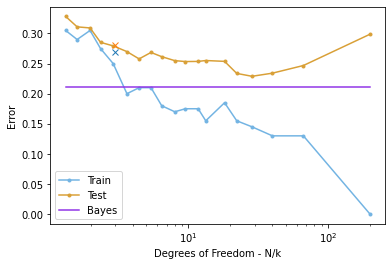

In [6]:
ax = err_neigh.plot(style='.-', logx=True, colormap=ListedColormap([BLUE, ORANGE]))
err_bayes.plot(ax=ax, legend=True, colormap=ListedColormap([PURPLE]))
err_reg.plot(ax=ax, legend=False, style='x', colormap=ListedColormap([BLUE, ORANGE]))
ax.set_xlabel("Degrees of Freedom - N/k")
ax.set_ylabel("Error");